In [1]:
import torch
from common.networks import *
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

c:\Users\Salim\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


### Variational AutoEncoder

In [2]:
lr=1e-3
batch_size=128
num_epoch = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_data = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

In [8]:
# Initialize model, optimizer, loss
vae = VariationalAutoEncoder(input_dim=784, z_dim=10, device=device).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss(reduction='none')
# Run training
vae.train(num_epoch, optimizer, loss_fn, train_loader)

0it [00:00, ?it/s, loss=2.25e+3]

938it [00:26, 35.52it/s, loss=208]   
938it [00:28, 33.47it/s, loss=199]
938it [00:28, 33.23it/s, loss=207]


### Nombre of parameters
The number of parameters of our VAE is indicated below

In [ ]:
nombre_param = sum([p.numel() for p in vae.parameters() if p.requires_grad])
nombre_param

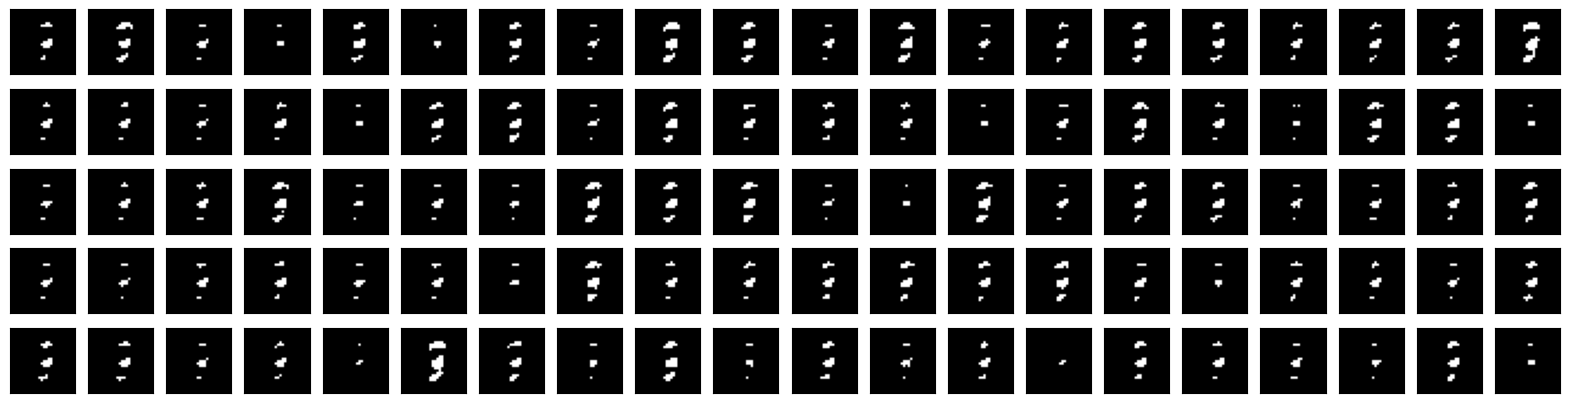

In [4]:
gen_vae = vae.generate_images(num_samples=100) # we generate 100 samples and perform 100 gibbs sampling
plt.figure(figsize=(20,5))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(gen_vae[i].detach().cpu().numpy().reshape(28,28),cmap='gray')
    plt.xticks([])
    plt.yticks([])